In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import subprocess
from itertools import product

In [8]:
path = '../'
executable = 'bin/ex1'
# config_file = 'bin/configuration.in.example'

In [9]:
def stringify_dict(d: dict, sep=',') -> str:
    return sep.join(map(lambda a: str(a[0]) + "=" + str(a[1]), tuple(d.items())))

In [10]:
def run(config_file: str, output_file: str, params: dict = {}) -> None:
    # print(f"Running with config file {config_file}")
    options = stringify_dict(params, sep=' ')
    cmd = f"{path}{executable} {path}{config_file} output='{path}{output_file}' {options}"
    print(f"Running command `{cmd}`")
    subprocess.run(cmd, shell=True, stdout=subprocess.DEVNULL)
    # print("Done")

In [11]:
nsteps = np.array([5, 10, 50, 80, *range(100, 2000, 100)]) # TODO change
nsimul = len(nsteps)  # Number of simulations to perform

m = 0.056
v0 = 5
omega = 10
mu = 6
rho = 1.2
R = 0.033

alpha = mu * omega * R**3 * rho / m
tfin = 2 * np.pi / alpha
print(f"{tfin=}")
dt = tfin / nsteps

tfin=135.98580587094423


In [12]:
%%bash
cd .. && make clean && make

rm: cannot remove 'data/*.log': No such file or directory


clang++ -o bin/ex1 src/Exercice1_student.cpp -std=c++17 -Wall -Wextra -O2 


In [13]:
params_variations = {
    'nsteps': nsteps,
    'alpha': [0.5],
}
config_name = "rotate_friction"
all_params = tuple(
    {a: b for a, b in zip(params_variations.keys(), c)} for c in product(*params_variations.values())
)

# Run simulations
outputs = []  # List to store output file names
for params in all_params:
    output_file = f"data/{config_name},{stringify_dict(params)}.out"
    outputs.append(output_file)
    run(f'bin/{config_name}.conf', output_file, params)

Running command `../bin/ex1 ../bin/rotate_friction.conf output='../data/rotate_friction,nsteps=5,alpha=0.5.out' nsteps=5 alpha=0.5`
Running command `../bin/ex1 ../bin/rotate_friction.conf output='../data/rotate_friction,nsteps=10,alpha=0.5.out' nsteps=10 alpha=0.5`
Running command `../bin/ex1 ../bin/rotate_friction.conf output='../data/rotate_friction,nsteps=50,alpha=0.5.out' nsteps=50 alpha=0.5`
Running command `../bin/ex1 ../bin/rotate_friction.conf output='../data/rotate_friction,nsteps=80,alpha=0.5.out' nsteps=80 alpha=0.5`
Running command `../bin/ex1 ../bin/rotate_friction.conf output='../data/rotate_friction,nsteps=100,alpha=0.5.out' nsteps=100 alpha=0.5`
Running command `../bin/ex1 ../bin/rotate_friction.conf output='../data/rotate_friction,nsteps=200,alpha=0.5.out' nsteps=200 alpha=0.5`
Running command `../bin/ex1 ../bin/rotate_friction.conf output='../data/rotate_friction,nsteps=300,alpha=0.5.out' nsteps=300 alpha=0.5`
Running command `../bin/ex1 ../bin/rotate_friction.conf ou

In [14]:
# Filter stuff
explicit = []
implicit = []
semi_implicit = []

for file, params in zip(outputs, all_params):
    match params:
        case {'alpha': 0}: explicit.append((file, params))
        case {'alpha': 0.5}: semi_implicit.append((file, params))
        case {'alpha': 1}: implicit.append((file, params))
        case _: print("Feur alert")

print(semi_implicit)

[('data/rotate_friction,nsteps=5,alpha=0.5.out', {'nsteps': 5, 'alpha': 0.5}), ('data/rotate_friction,nsteps=10,alpha=0.5.out', {'nsteps': 10, 'alpha': 0.5}), ('data/rotate_friction,nsteps=50,alpha=0.5.out', {'nsteps': 50, 'alpha': 0.5}), ('data/rotate_friction,nsteps=80,alpha=0.5.out', {'nsteps': 80, 'alpha': 0.5}), ('data/rotate_friction,nsteps=100,alpha=0.5.out', {'nsteps': 100, 'alpha': 0.5}), ('data/rotate_friction,nsteps=200,alpha=0.5.out', {'nsteps': 200, 'alpha': 0.5}), ('data/rotate_friction,nsteps=300,alpha=0.5.out', {'nsteps': 300, 'alpha': 0.5}), ('data/rotate_friction,nsteps=400,alpha=0.5.out', {'nsteps': 400, 'alpha': 0.5}), ('data/rotate_friction,nsteps=500,alpha=0.5.out', {'nsteps': 500, 'alpha': 0.5}), ('data/rotate_friction,nsteps=600,alpha=0.5.out', {'nsteps': 600, 'alpha': 0.5}), ('data/rotate_friction,nsteps=700,alpha=0.5.out', {'nsteps': 700, 'alpha': 0.5}), ('data/rotate_friction,nsteps=800,alpha=0.5.out', {'nsteps': 800, 'alpha': 0.5}), ('data/rotate_friction,ns

# Plots!

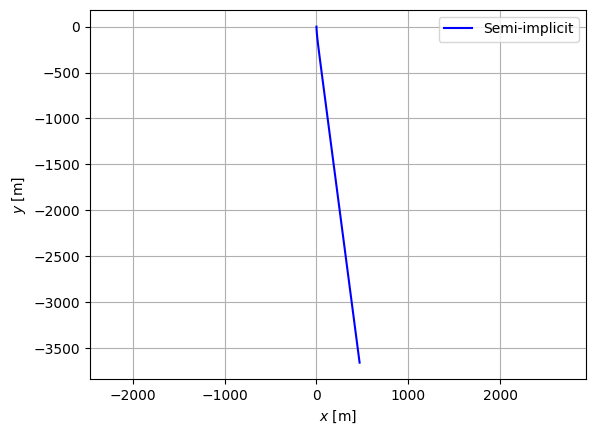

In [15]:
data = np.loadtxt(path + semi_implicit[-1][0])
xx3, yy3 = data[:, 1], data[:, 2]
plt.plot(xx3, yy3, c='b', label='Semi-implicit')

plt.axis('equal')
plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$y$ [m]')
plt.grid()
plt.legend()
plt.show()

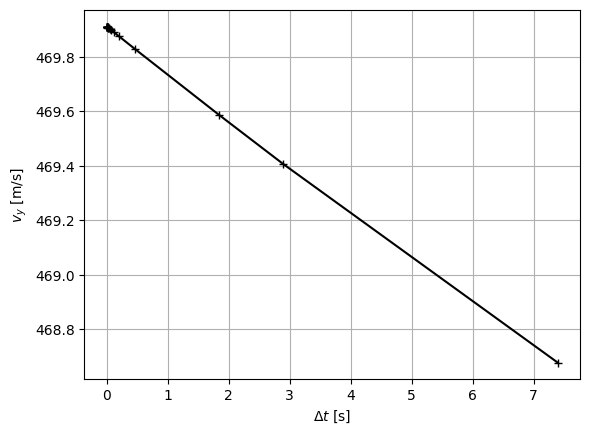

In [24]:
"""
Si on n'a pas la solution analytique: on représente la quantite voulue
(ci-dessous v_y, TODO: modifier selon vos besoins)
en fonction de (Delta t)^norder, ou norder est un entier.
"""
def calc(dataset):
    stuffies = []
    for i, (file, params) in enumerate(dataset):
        data = np.loadtxt(path + file)
        t, xx, yy, vx, vy, En = data[:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5]
        stuffies.append(xx[-1])
    return stuffies

norder = 2  # TODO: Modify if needed

stuff = calc(semi_implicit)
plt.figure()
plt.plot(dt**norder, stuff, 'k+-')
plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'$v_y$ [m/s]')
plt.xticks()
plt.yticks()
plt.grid()